In [1]:
import v123
import neuropythy as ny
import numpy as np
import scipy as sp

# Matplotlib is used for plotting
import matplotlib, matplotlib.pyplot as plt
%gui qt
%matplotlib inline

from neuropythy.cortex import cortex_plot, vertex_eccen_color, vertex_angle_color

# Aggregate Retinotopy Data

This section of the notebook briefly looks at the aggregate retinotopy data that was used to construct the anatomical template of retinotopy in both [Benson *et al.* (2012)](http://dx.doi.org/10.1016/j.cub.2012.09.014) and in [Benson *et al.* (2014)](http://dx.doi.org/10.1371/journal.pcbi.1003538). (This data is bundled together with the V123 project data.) We reanalyze it and refit the anatomical template of retinotopy here, and analyze how the resulting prediction of aggregate retinotopic maps in V1-V3 varies in terms of the parameters of the registration.

### Plots of the Aggregate Retinotopic Maps

These plots show the polar angle and eccentricity values of the retinotopic maps; transparency of the maps with respect to the curvature underlay is calculated according to the weight of each vertex, which is inversely proportional to the standard deviation of the polar angle and eccentricity values across subjects.

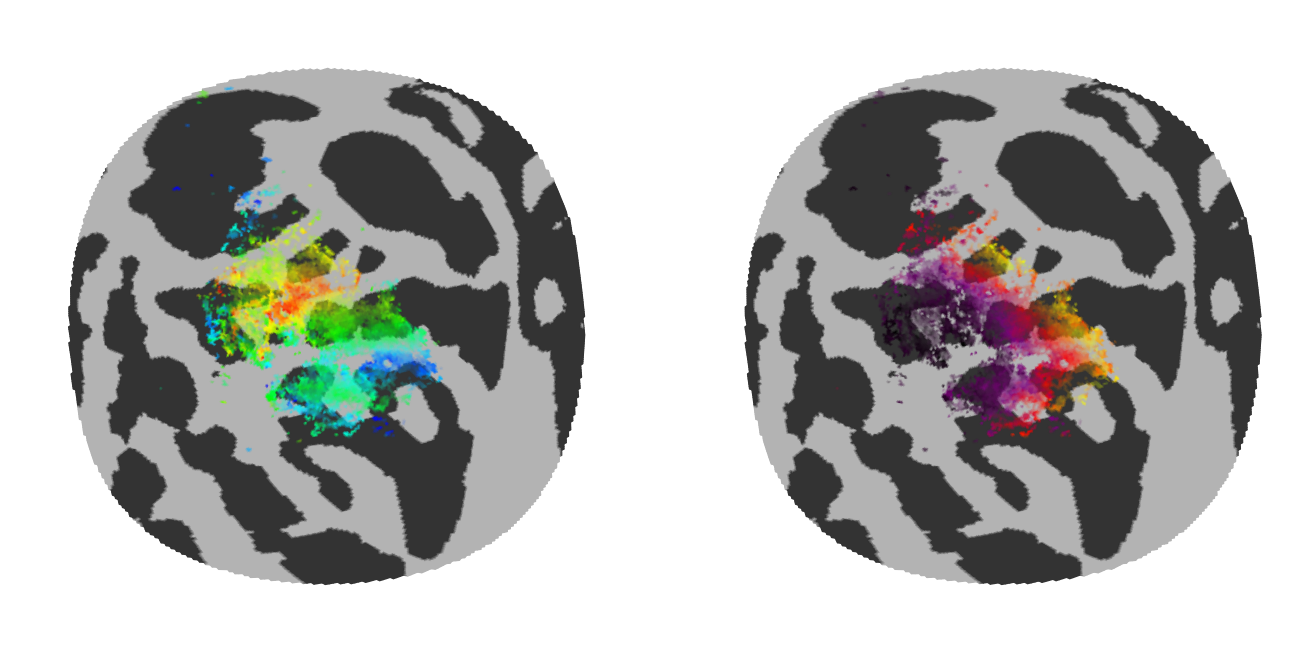

In [2]:
agg = v123.aggregate_prep()
(f, axs) = plt.subplots(1, 2, figsize=(16,8))
cortex_plot(agg['map'], plotter=axs[0], color=vertex_angle_color)
cortex_plot(agg['map'], plotter=axs[1], color=vertex_eccen_color)
for ax in axs: 
    ax.axis('equal')
    ax.axis('off')

In [ ]:
agg  = aggregate_prep()
agg  = aggregate()
pred = reg['prediction']
(f, axs) = plt.subplots(1, 2, figsize=(16, 8))
for (s,ax) in axs:
    f = plt.figure()
    m = agg['map']
    m = m.using(
        properties=m.properties.using(
            polar_angle=pred['polar_angle'][m.vertex_labels],
            eccentricity=pred['eccentricity'][m.vertex_labels],
            visual_area=pred['V123_label'][m.vertex_labels],
            weight=(0.65*(~np.isclose(pred['V123_label'][m.vertex_labels], 0)))))
    cortex_plot(m, plotter=ax_row[0], color=vertex_angle_color)
    cortex_plot(m, plotter=ax_row[1], color=vertex_eccen_color)
    for a in ax_row:
        a.axis('equal')
        a.axis('off')
    ax_row[0].text(-34, 34, 'steps = %4d' % s)

## Registration Parameters

The two cells below performs registration of the aggregate while varying one of two things. The first cell varies the number of steps taken by the minimization algorithm from 250 to 8000 (taking exponential steps). The second cell holds the number of steps at 2000 but varies the relative weight of the potential function term that minimizes the fit of the retinotopic measurements to the retinotopic model relative to the weight of the term that minimizes the amount of deformation of the mesh.

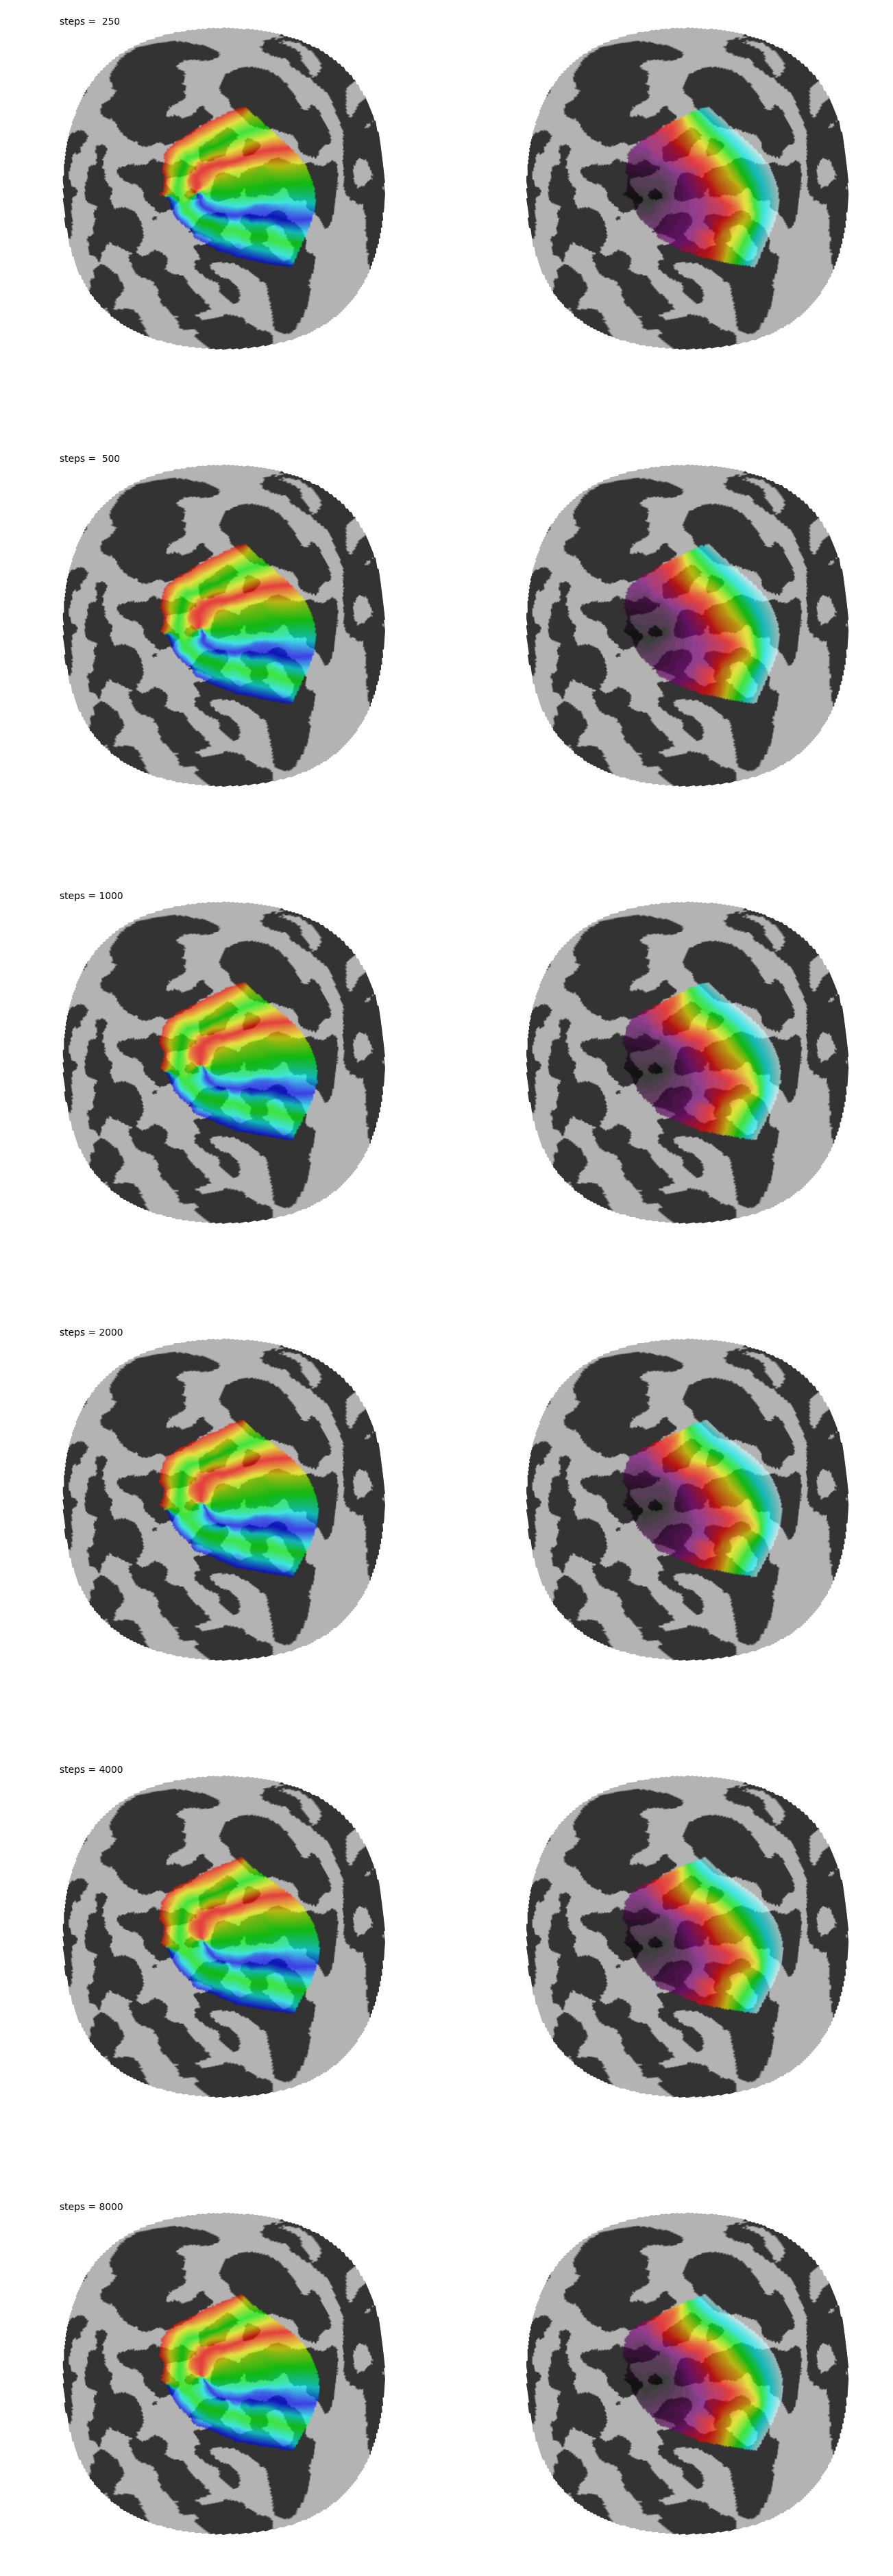

In [21]:
agg_steps = [250, 500, 1000, 2000, 4000, 8000]
agg = v123.aggregate_prep()
agg_regs_by_steps = {k: v123.aggregate_register(scale=1.0, steps=k)
                     for k in agg_steps}
nconds = len(agg_regs_by_steps)
(f, axs) = plt.subplots(nconds, 2, figsize=(16, 8*nconds))
for (s,ax_row) in zip(agg_steps, axs):
    f = plt.figure()
    reg  = agg_regs_by_steps[s]
    pred = reg['prediction']
    m = agg['map']
    m = m.using(
        properties=m.properties.using(
            polar_angle=pred['polar_angle'][m.vertex_labels],
            eccentricity=pred['eccentricity'][m.vertex_labels],
            visual_area=pred['V123_label'][m.vertex_labels],
            weight=(0.65*(~np.isclose(pred['V123_label'][m.vertex_labels], 0)))))
    cortex_plot(m, plotter=ax_row[0], color=vertex_angle_color)
    cortex_plot(m, plotter=ax_row[1], color=vertex_eccen_color)
    for a in ax_row:
        a.axis('equal')
        a.axis('off')
    ax_row[0].text(-34, 34, 'steps = %4d' % s)

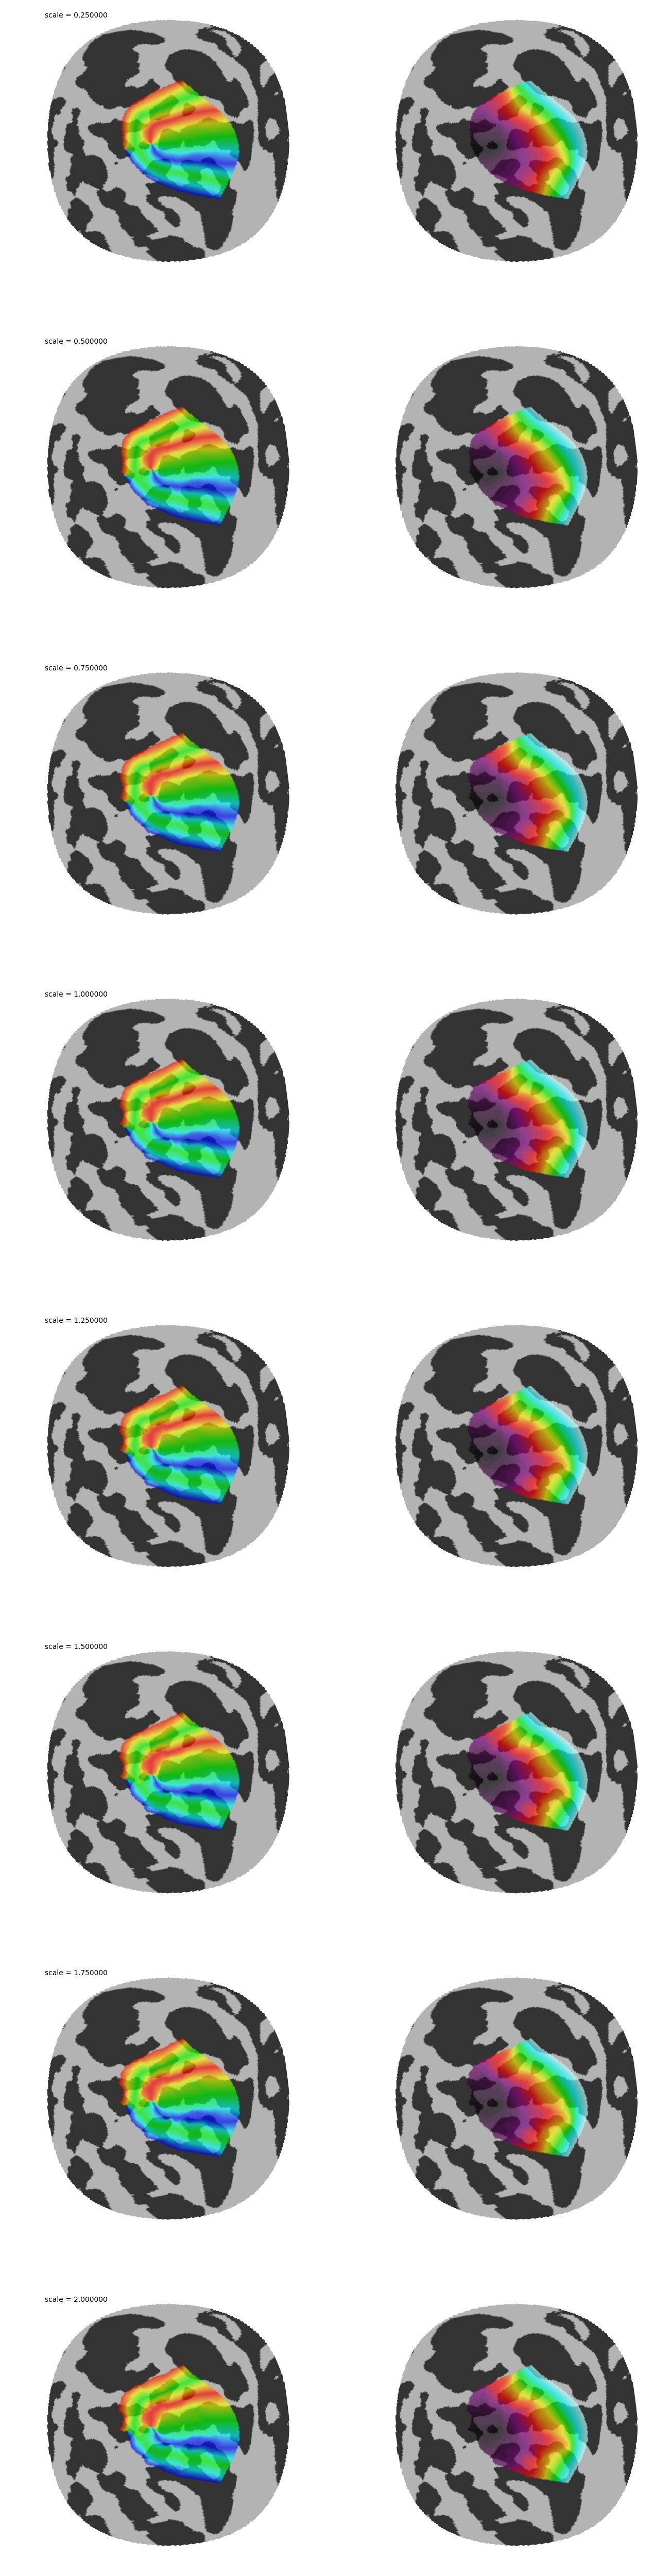

In [24]:
agg_scales = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0]
agg = v123.aggregate_prep()
agg_regs_by_scale = {k: v123.aggregate_register(scale=k, steps=2000)
                     for k in agg_scales}

nconds = len(agg_regs_by_scale)
(f, axs) = plt.subplots(nconds, 2, figsize=(16, 8*nconds))
for (s,ax_row) in zip(agg_scales, axs):
    f = plt.figure()
    reg  = agg_regs_by_scale[s]
    pred = reg['prediction']
    m = agg['map']
    m = m.using(
        properties=m.properties.using(
            polar_angle=pred['polar_angle'][m.vertex_labels],
            eccentricity=pred['eccentricity'][m.vertex_labels],
            visual_area=pred['V123_label'][m.vertex_labels],
            weight=(0.65*(~np.isclose(pred['V123_label'][m.vertex_labels], 0)))))
    cortex_plot(m, plotter=ax_row[0], color=vertex_angle_color)
    cortex_plot(m, plotter=ax_row[1], color=vertex_eccen_color)
    for a in ax_row:
        a.axis('equal')
        a.axis('off')
    ax_row[0].text(-34, 34, 'scale = %f' % s)

### Exporting the Aggregate Registrations
 

In [4]:
v123 = reload(v123)
v123.save_aggregate()